In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")


import numpy as np

In [43]:
file = pd.read_csv("Resources/CleanAirbnbData.csv")
file.head()

,ID,Name,Host ID,Host Name,Neighbourhood Group,Neighbourhood,Latitude,Longitude,Room Type,Price,Minimum Nights,Number of Reviews,Last Review,Reviews per Month,Calculated Host Listings Count,Availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [44]:
x=file[pd.isnull(file).any(axis=1)]
x.shape

(5216, 16)

In [72]:
agg_dict={'Price': np.mean,
          'Number of Reviews': np.mean,
          'Minimum Nights': np.max
          'Availability': np.mean
         }

summary=file.groupby('Neighbourhood Group').agg(agg_dict)
summary.reset_index(drop=False, inplace=True)

SyntaxError: invalid syntax (<ipython-input-72-8ac82225735e>, line 4)

In [75]:
test=file[['Neighbourhood Group', 'Price', 'Number of Reviews', 'Minimum Nights', 'Availability']]

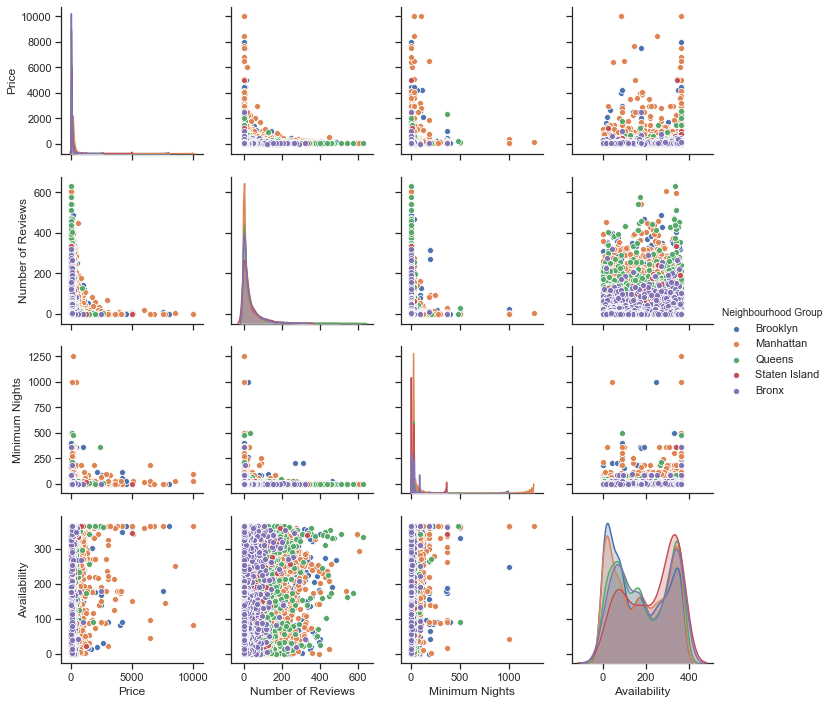

In [76]:
g=sns.pairplot(test, hue="Neighbourhood Group")

In [56]:
file['Host ID'].value_counts()
file['Host ID'].unique()


array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

In [57]:
print(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31362 entries, 0 to 31361
Data columns (total 16 columns):
ID                                31362 non-null int64
Name                              31358 non-null object
Host ID                           31362 non-null int64
Host Name                         31354 non-null object
Neighbourhood Group               31362 non-null object
Neighbourhood                     31362 non-null object
Latitude                          31362 non-null float64
Longitude                         31362 non-null float64
Room Type                         31362 non-null object
Price                             31362 non-null int64
Minimum Nights                    31362 non-null int64
Number of Reviews                 31362 non-null int64
Last Review                       26155 non-null object
Reviews per Month                 26155 non-null float64
Calculated Host Listings Count    31362 non-null int64
Availability                      31362 non-null int64

In [58]:
file.describe()

,ID,Host ID,Latitude,Longitude,Price,Minimum Nights,Number of Reviews,Reviews per Month,Calculated Host Listings Count,Availability
count,3.136200e+04,3.136200e+04,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000,26155.000000,31362.000000,31362.000000
mean,2.100481e+07,8.144950e+07,40.728401,-73.948745,162.050475,8.338658,31.852369,1.810126,10.334067,175.831994
std,1.148631e+07,8.673088e+07,0.056561,0.051397,254.425463,23.836703,51.636804,1.805707,40.700398,126.187636
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000
25%,1.167514e+07,8.620116e+06,40.688383,-73.983270,70.000000,2.000000,2.000000,0.450000,1.000000,55.000000
50%,2.254548e+07,4.109561e+07,40.723720,-73.954110,111.500000,3.000000,10.000000,1.230000,1.000000,168.000000
75%,3.119407e+07,1.452145e+08,40.763030,-73.930133,189.000000,5.000000,39.000000,2.680000,3.000000,305.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [62]:
file['Room Type'].value_counts()

Entire home/apt    16533
Private room       13965
Shared room          864
Name: Room Type, dtype: int64

In [63]:
file['Neighbourhood Group'].value_counts(dropna = False, normalize = True)


Manhattan        0.432338
Brooklyn         0.390919
Queens           0.137045
Bronx            0.029144
Staten Island    0.010554
Name: Neighbourhood Group, dtype: float64

([<matplotlib.patches.Wedge at 0x19c8eacf8>,
 [Text(0.19589098201007543, 1.0824170744990715, ''),
  Text(-0.6544005041792901, -0.8841719177455768, ''),
  Text(0.9365212904925617, -0.5769990229230435, ''),
  Text(1.0923467232360349, -0.1295323752407009, ''),
  Text(1.0996841146061016, -0.02635997122522276, '')])

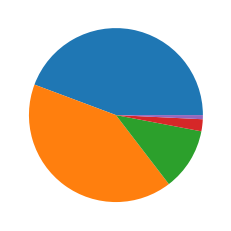

Text(0, 0.5, 'Ratio')

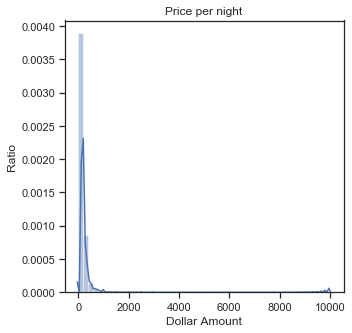

In [64]:
plt.figure(figsize=(5,5))
sns.distplot(file['Price'])
plt.title("Price per night")
plt.xlabel('Dollar Amount')
plt.ylabel('Ratio')

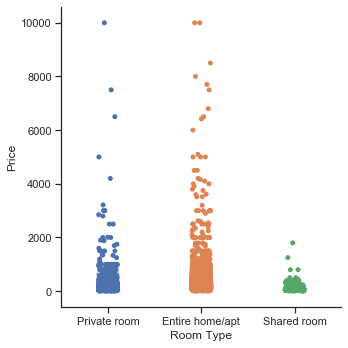

In [65]:
#room type & price

sns.catplot(x="Room Type", y="Price", data=file);

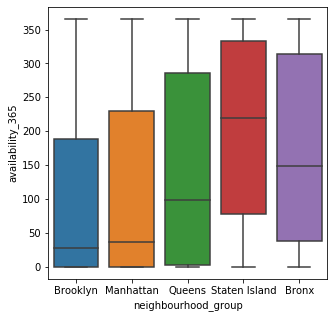

In [62]:
#neighbopurhood group & room availibility

plt.figure(figsize=(5,5))
df1 = sns.boxplot(data=file, x='Neighbourhood Group',y='Availability')

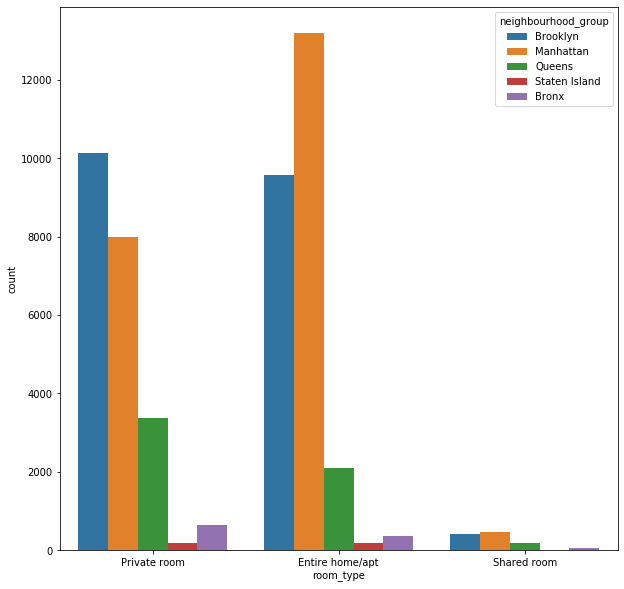

In [64]:
#room type and neighhbourhood type

plt.figure(figsize=(10,10))
df1 = sns.countplot(file['Room Type'],hue=file['Neighbourhood Group'])

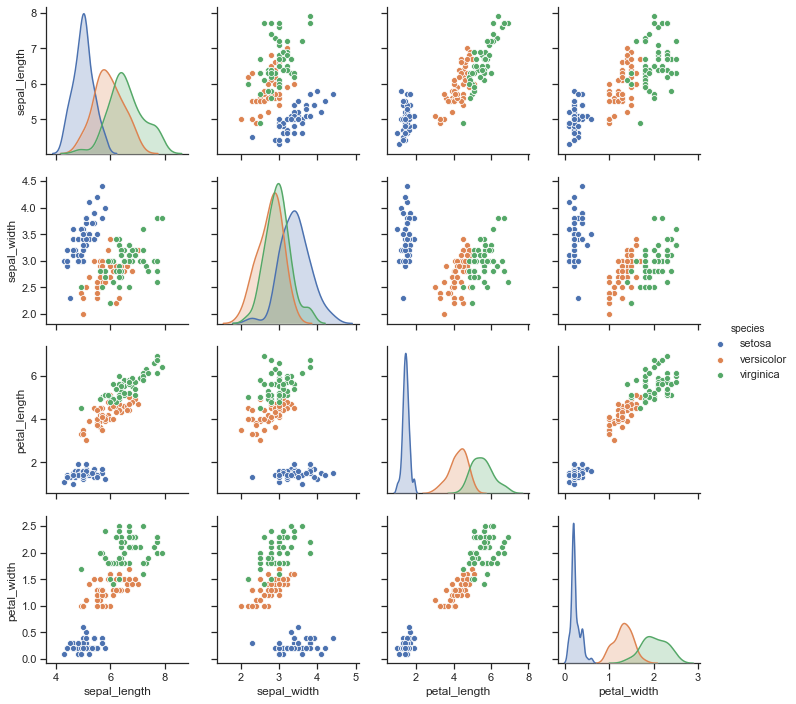

In [3]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
g=sns.pairplot(df, hue="species")

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [31]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

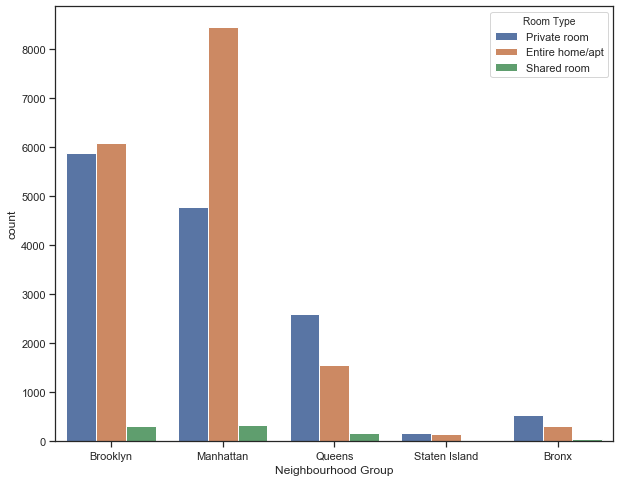

In [78]:
plt.figure(figsize=(10,8))
sns.countplot(x="Neighbourhood Group", hue="Room Type", data=file)
plt.show()


#

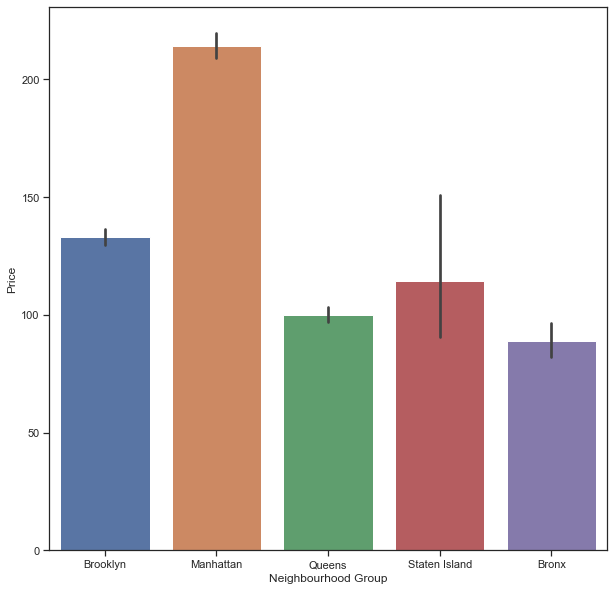

In [80]:
pricesort = file.groupby("Neighbourhood Group").agg({"Price":"mean"}).sort_values("Price", ascending=False).reset_index()

plt.figure(figsize=(10,10))
sns.barplot(x="Neighbourhood Group", y="Price", data=file)
plt.show()


#Manhatten has the haighest average price

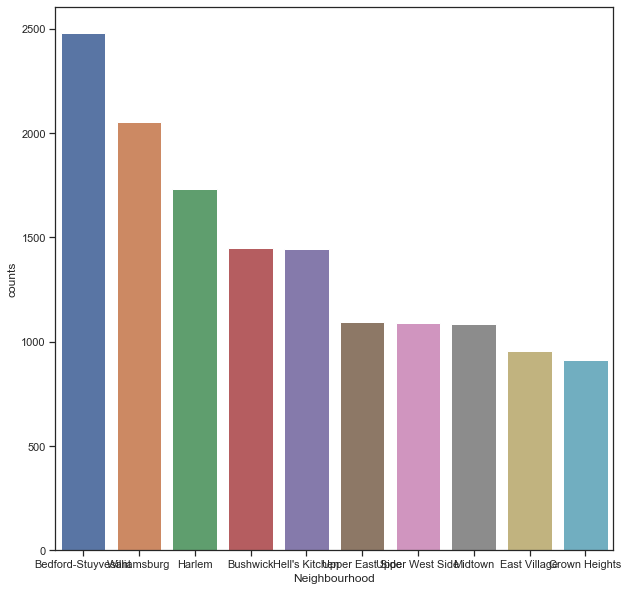

In [84]:
popneighbourhood = file['Neighbourhood'].value_counts().head(10).reset_index()
popneighbourhood.columns = ['Neighbourhood','counts']

plt.figure(figsize=(10,10))
sns.barplot(x='Neighbourhood', y='counts', data=popneighbourhood)
plt.show()